In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from catboost import Pool
import shap


In [22]:
df_4 = pd.read_spss('caspian4-ghorbani.sav',convert_categoricals=False)

In [23]:
rename={
    "universi":"university",
    "cross":"grade",
    "sex":"gender",
    "birth_ye":"birth_date",
    "a_1":"close_friend_count",
    "a_2":"spent_time_friend1",
    "a_3":"spent_time_friend2",
    "a_4":"chatting_online",
    "bodyimag5halati":"body_image",
    "barnamenutrition4halati":"diet_plan",
    "breakfastroutindays":"breakfast_routindays",
    "breakfastfriday":"breakfast_friday",
    "naharroutinday":"lunch_routinday",
    "naharfriday":"lunch_friday",
    "shamroutinday":"dinner_routinday",
    "shamfriday":"dinner_friday",
    "Sweet":"sweet",
    "saltysnack":"saltysnack",
    "noshabeh":"soda",
    "MiveyeTazehe2halati":"fresh_fruit",
    "MiveyeKhoshk":"dry_fruit",
    "Swetenedbeverage":"fresh_juice",
    "abmiveyebastebandishodeh":"packed_juice",
    "vegtebale":"vegtebales",
    "Milk":"milk",
    "fastfoods":"fastfoods",
    "newphysicalactivietyhour":"physical_activiety_hour",
    "PhysicActive":"physical_activiety",
    "TVwatchingroutinday":"TV_watching_routinday",
    "TVwatchingFriday ":"TV_watching_friday",
    "Computerworkroutinday":"computer_work_routinday",
    "ComputerworkFriday":"computer_work_friday",
    "Sleephoursroutinday":"sleep_hours_routinday",
    "SleephoursrFriday":"sleep_hours_friday",
    "injurynumber":"injury_number",
    "h_44":"injury_place",
    "h_45":"injury_cause",
    "h_46":"injury_threatment_place",
    "physicalfightnumber":"fight_number",
    "i_48":"litigant",
    "hamlselahnumber":"carryـweapons",
    "victimnumber":"victim_number",
    "bullynumber":"bully_number",
    "madargelyani":"mother_hookah",
    "pedargelyani":"father_hookah",
    "baradrkhahargelyani":"sibling_hookah",
    "sayerfradgelyani":"others_hookah",
    "pedarsigari":"father_smoker",
    "madarsigari":"mother_smoker",
    "baradaryakhaharsigari":"sibling_smoker",
    "sayerafradkhanevadehsigari":"others_smoker",
    "l_56":"comfort_mother",
    "l_59":"comfort_friend",
    "l_55":"comfort_father",
    "l_58":"comfort_sister",
    "l_57":"comfort_brother",
    "confusionnumber":"confusion_number",
    "worthlessnumber":"worthless_number",
    "insomnianumber":"insomnia_number",
    "m_62":"back_pain_number",
    "m_61":"headache_number",
    "worriednumber":"worried_number",
    "m_60":"stomach_ache_number",
    "angrinessnumber":"angriness_number",
    "depression":"depression",
    "Anxietynumber":"anxiety_number",
    "SRH4halati":"mental_health_overview",
    "activesmokertype":"smoker_type",
    "activecurrentsmoker":"current_smoker_status",
    "n_85":"smoke_leisure",
    "n_83":"smoke_escaping_problems",
    "n_87":"smoke_pleasure",
    "n_86":"smoke_feeling_grown_up",
    "n_79":"smoke_anxiety_reduction",
    "n_80":"smoke_social_acceptance",
    "n_82":"smoke_confidence_boost",    
    "n_81":"smoke_focus",
    "n_77":"smoke_staying_awake",
    "n_78":"smoke_feeling_loved",
    "weight_1":"weight",
    "height_2":"height",
    "waist_3":"waist",
    "wrist_5":"wrist",
    "hip_4":"hip",
    "systolic":"systolic",
    "diastoli":"diastoli",
    "age":"age",
    "catage":"catage",
    "family_a":"family_size",
    "v124_a":"home_ownership",
    "fathereducation6halati":"father_edu",
    "mothereducation6halati":"mother_edu",
    "fatherjob":"father_job",
    "motherjob":"mother_job",
    "scholltype":"school_type",
    "v129_a":"car_ownership",
    "v130_a":"computer_ownership",
    "livingparent":"livingparent",
    "childerennumber":"childeren_number",
    "birthorder":"birth_order",
    "birthweight":"birthweight",
    "milktype":"milk_type",
    "beastfeedingduration":"breast_feeding_duration",
    "complementryfeeding":"complementry_feeding",
    "breadtyp":"bread_type",
    "oiltype":"oil_type",
    "saltadde":"table_salt",
    "dairytype":"dairy_type",
    "fattydairyparent":"fatty_dairy",
    "usualdairyparent":"usual_dairy",
    "grains":"grains",
    "meat":"meat",
    "liverandkalepache":"liverandkalepache",
    "bread":"bread",
    "rice":"rice",
    "potatoandfresh":"potato",
    "friedfoods":"friedfoods",
    "d_55":"fruit_nut_substitute",
    "d_51":"reduce_fast_food",
    "d_54":"increase_vegetables",
    "d_50":"reduce_salt",
    "d_53":"reduce_sugar",
    "d_49":"reduce_fat",
    "d_52":"use_liquid_oil",
    "injery_5":"injery_parent_ask",
    "v203_a":"injury_complication"

}

In [24]:
df_4.rename(columns=rename, inplace=True)   

In [26]:
df_4.head()

,source,code,university,province,iranregion,region,cluster,grade,gender,birth_date,...,injury_complication,BMIWHO4Halati2,Bodyimage3Halati2,Fatherconsultant,Motherconsultant,Friendconsultant,brotherconsultant,sisterconsultant,brosiscons,brothersisterconsultant
0,2.0,1.911922e+10,khozestan-ahvaz,khozestan,West,urban,19.0,rahnamayi,boy,79.0,...,,Obesity,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,2.0,1.912522e+10,khozestan-ahvaz,khozestan,West,urban,25.0,rahnamayi,boy,74.0,...,,Normal,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,3.0,8.122128e+09,boshehr,boshehr,West,urban,22.0,ebtedayi,girl,80.0,...,,Obesity,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4.0,3.128228e+09,ardabil,ardabil,West,urban,28.0,rahnamayi,girl,78.0,...,,,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4.0,3.105128e+09,ardabil,ardabil,West,urban,5.0,ebtedayi,girl,81.0,...,,Obesity,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [29]:
def preprocess(df_org):
 # Dictionary to store processed DataFrames


    df = df_org.copy()
    df.replace('', np.nan, inplace=True)
    df.replace('?', np.nan, inplace=True)
    # Filter age
    df = df[(df["age"] >= 7) & (df["age"] <= 18)]

    # Convert height and weight to numeric
    df['height'] = pd.to_numeric(df['height'], errors='coerce')
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')


    # Remove null tuples
    records_with_nulls = df[
        df["gender"].isna()
    ]
    df = df.dropna(subset=["gender"])
    missing_percent = df.isna().mean()*100
    threshold = 70
    df = df.loc[:, missing_percent <= threshold]

    # Fill missing values by grouping by age and using the mode
    for col in df.columns:
        if df[col].isna().any():  # Only process columns with missing values
            df[col] = df.groupby('age')[col].transform(
                lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
            )

    print(
        f"Number of records with NaN value in sex in : {len(records_with_nulls)}"
    )

    return df



# Preprocess the input data
df_4 = preprocess(df_4)





Number of records with NaN value in sex in : 0


In [30]:
food_features=[
    'mealnumber',
    'Sweet2halati',
    'saltysnack2halati',
    'noshabeh2halati',
    'fresh_fruit',
    'MiveyeKhoshk2halati',
    'abmiveyebastebandishodeh2halati',
    'Swetenedbeverage2halati',
    'vegtebale2halati',
    'Milk2halati',
    'fastfood2halati',
    'bread_type',
    'newoiltype',
    'grains2h',
    'meat2h',
    'liverandkalepache2h',
    'friedfoods2h'
]

## unhealty 

In [31]:


# Detect columns to encode based on their unique values
columns_to_encode = [
'Sweet2halati','saltysnack2halati','noshabeh2halati','abmiveyebastebandishodeh2halati','fastfood2halati','meat2h','liverandkalepache2h','friedfoods2h'
]

# Define the mapping
mapping = {' Nondaily':0, 'Daily':-1}

# Apply the mapping to the detected columns
df_4[columns_to_encode] = df_4[columns_to_encode].applymap(lambda x: mapping.get(x, x))

print("Columns to encode:", columns_to_encode)

Columns to encode: ['Sweet2halati', 'saltysnack2halati', 'noshabeh2halati', 'abmiveyebastebandishodeh2halati', 'fastfood2halati', 'meat2h', 'liverandkalepache2h', 'friedfoods2h']


/tmp/ipykernel_6318/2242195572.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_4[columns_to_encode] = df_4[columns_to_encode].applymap(lambda x: mapping.get(x, x))


## healty

In [32]:
category_mapping_6 = {'3meals':3, 'Lunch-Dinner':2, '1 meal':1, 'Breakfast-Lunch':2,
       'Breakfast-Dinner':2, 'No meal':0}
category_mapping_69 = {'Daily':1, ' Nondaily':0}
df_4['mealnumber'] = df_4['mealnumber'].map(category_mapping_6)
df_4['fresh_fruit'] = df_4['fresh_fruit'].map(category_mapping_69)
df_4['MiveyeKhoshk2halati'] = df_4['MiveyeKhoshk2halati'].map(category_mapping_69)
df_4['Swetenedbeverage2halati'] = df_4['Swetenedbeverage2halati'].map(category_mapping_69)
df_4['vegtebale2halati'] = df_4['vegtebale2halati'].map(category_mapping_69)
df_4['Milk2halati'] = df_4['Milk2halati'].map(category_mapping_69)
df_4['grains2h'] = df_4['grains2h'].map(category_mapping_69)


category_mapping_bread={'bedune sabus':0, 'sabusdar':1}
category_mapping_oil={'unsaturated':1, 'saturated':-1}
df_4['bread_type'] = df_4['bread_type'].map(category_mapping_bread)
df_4['newoiltype'] = df_4['newoiltype'].map(category_mapping_oil)



In [33]:
df_4['food_score'] = df_4[food_features].sum(axis=1)


/tmp/ipykernel_6318/1189143921.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_4['food_score'] = df_4[food_features].sum(axis=1)


## mentall

In [34]:
mental_features = [

    "worthless_number",
    "angriness_number",
    "worried_number",
    "insomnia_number",
    "confusion_number",
    "depression",
    "anxiety_number",
    "mental_health_overview",
    "LS"

]

In [35]:
category_mapping_11 = {'kheir':0, 'bali':1, 'bekhater nadarm':0, '0.0':0}
df_4['depression'] = df_4['depression'].map(category_mapping_11)
category_mapping_12 = {'benodrat ya hargez':0, 'taqriban har mah':1, 'taqriban har ruz':4,
       'bish az 1bar':3, 'taqriban har hafte':2}
df_4['insomnia_number'] = df_4['insomnia_number'].map(category_mapping_12)

df_4['confusion_number'] = df_4['confusion_number'].map(category_mapping_12)
df_4['angriness_number'] = df_4['angriness_number'].map(category_mapping_12)
df_4['worthless_number'] = df_4['worthless_number'].map(category_mapping_12)
df_4['worried_number'] = df_4['worried_number'].map(category_mapping_12)
#com_map={'kasi nadarm ya dur ast':1, 'raht':0, 'doshvar':1}
com_map={'khob':1, 'aali':0, 'motevaset':2,'bad':3}
df_4['mental_health_overview'] = df_4['mental_health_overview'].map(com_map)
df_4['LS'] = 10 - df_4['LS']
com_map_v={'hichvaght':0, '1ruz':1, '2 ta 3 ruz':2, '6ruz ya bishtar':4, '4 ta 5ruz':3}
df_4['carryـweapons'] = df_4['carryـweapons'].map(com_map_v)
# df_4['comfort_sister'] = df_4['comfort_sister'].map(com_map)
# df_4['comfort_friend'] = df_4['comfort_friend'].map(com_map)
# df_4['comfort_brother'] = df_4['comfort_brother'].map(com_map)
# df_4['comfort_mother'] = df_4['comfort_mother'].map(com_map)
# df_4['comfort_father'] = df_4['comfort_father'].map(com_map)
from sklearn.preprocessing import LabelEncoder
df_4['fight_number']=df_4['fight_number'].astype(int)
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to multiple columns
columns_to_encode = [

'anxiety_number','bully_number']  # Replace with your actual column names

for column in columns_to_encode:
    df_4[column ] = encoder.fit_transform(df_4[column])



In [36]:
df_4['mental_score'] = df_4[mental_features].sum(axis=1)

/tmp/ipykernel_6318/182830637.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_4['mental_score'] = df_4[mental_features].sum(axis=1)


## voilence

In [37]:
violence_features = [
    "fight_number",
    "carryـweapons",
    "bully_number",

]


In [38]:
com_map_v={'hichvaght':0, '1ruz':1, '2 ta 3 ruz':2, '6ruz ya bishtar':4, '4 ta 5ruz':3}
df_4['carryـweapons'] = df_4['carryـweapons'].map(com_map_v)
from sklearn.preprocessing import LabelEncoder
df_4['fight_number']=df_4['fight_number'].astype(int)
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to multiple columns
columns_to_encode = [

'anxiety_number','bully_number']  # Replace with your actual column names

for column in columns_to_encode:
    df_4[column ] = encoder.fit_transform(df_4[column])


In [39]:
df_4['violence_score'] = df_4[violence_features].sum(axis=1)

/tmp/ipykernel_6318/1010815222.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_4['violence_score'] = df_4[violence_features].sum(axis=1)


In [40]:
#df_4['mental_score'] = df_4['mental_score'].max() - df_4['mental_score']

In [41]:
activity_features=[
    'physical_activiety',
    'Sportclasshours'
]
# Define the custom mapping
category_mapping_13 = {'1ruz':0.5, '7ruz':3.5, '2ruz':1, '3ruz':1.5, '4ruz':2, 'hich ruzi':0, '6ruz':3, '5ruz':2.5}
# Apply the mapping to the 'Category' column
df_4['physical_activiety'] = df_4['physical_activiety'].map(category_mapping_13)
category_mapping_h = {'2 saat':2, '1 saat':1, '0 saat':0, '3 saat ya bishtar':3}
# Apply the mapping to the 'Category' column
df_4['Sportclasshours'] = df_4['Sportclasshours'].map(category_mapping_h)
df_4['activity_score']=df_4[activity_features].sum(axis=1)

/tmp/ipykernel_6318/2452513050.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_4['activity_score']=df_4[activity_features].sum(axis=1)


### hygiene

In [43]:
hygiene_feature=[
    'e_26', #mesvak 
    'e_28',
    'e_30',
    'e_31'
]
# Define the custom mapping
category_mapping_tooth = {'1bar dar ruz':3, 'bish az 1bar dar ruz':3, 'hadaghal 1bar dar ruz':3,
       'hichvaght':0, 'faghat 1bar dar hafte':2, 'kamtar az 1bar dar hafte':1}
# Apply the mapping to the 'Category' column
df_4['e_26'] = df_4['e_26'].map(category_mapping_tooth)
category_mapping_wash = {'hamishe':2, 'gahi':1, 'na hichvaght':0}
# Apply the mapping to the 'Category' column
df_4['e_28'] = df_4['e_28'].map(category_mapping_wash)
df_4['e_30'] = df_4['e_30'].map(category_mapping_wash)
df_4['e_31'] = df_4['e_31'].map(category_mapping_wash)
df_4['hygiene_score']=df_4[hygiene_feature].sum(axis=1)

/tmp/ipykernel_6318/4190041428.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_4['hygiene_score']=df_4[hygiene_feature].sum(axis=1)


In [44]:
df_girl=df_4[df_4['gender']=='girl']
df_boy=df_4[df_4['gender']=='boy']

In [54]:
a=['gender','food_score','violence_score','mental_score','hygiene_score','activity_score','ses','BMIWHO4Halati2','age']

In [55]:
df_4[a].to_csv("casp4_scores.csv")

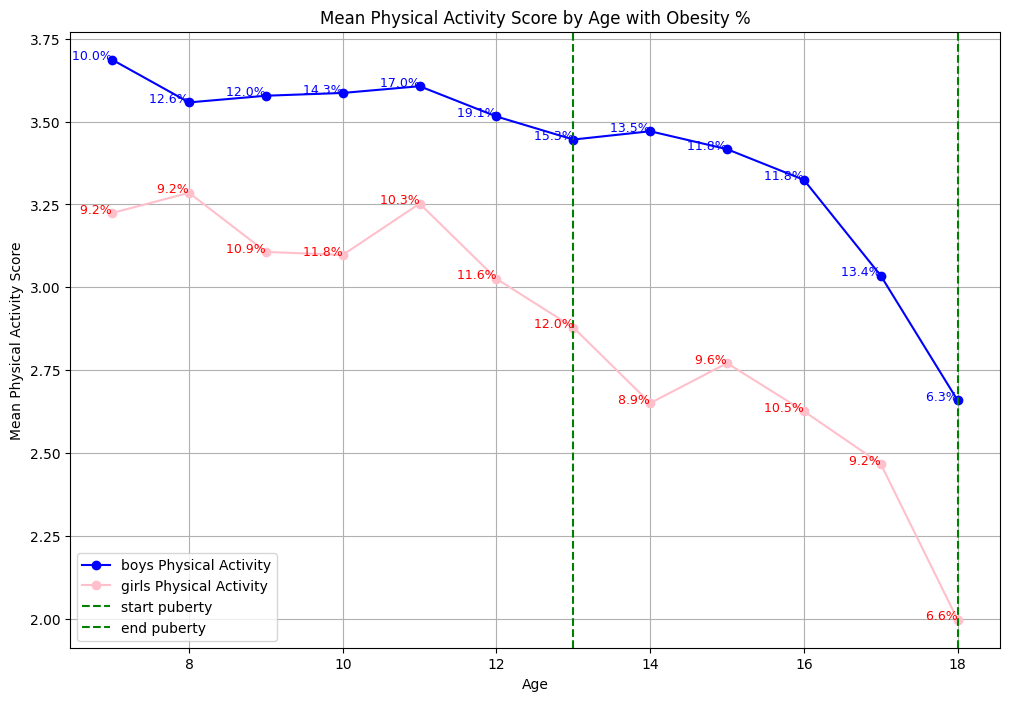

In [78]:
import matplotlib.pyplot as plt

# Define obesity condition
obesity_boy = df_boy[df_boy['BMIWHO4Halati2'] == 'Obesity']
obesity_girl = df_girl[df_girl['BMIWHO4Halati2'] == 'Obesity']

# Count total number of boys and girls in each age group
total_boy_count = df_boy.groupby('age').size()
total_girl_count = df_girl.groupby('age').size()

# Count the number of boys and girls with obesity in each age group
obesity_boy_count = obesity_boy.groupby('age').size()
obesity_girl_count = obesity_girl.groupby('age').size()

# Calculate obesity percentage
obesity_boy_percent = (obesity_boy_count / total_boy_count * 100).fillna(0)
obesity_girl_percent = (obesity_girl_count / total_girl_count * 100).fillna(0)

# Plot the results
a = 'Physical Activity'
plt.figure(figsize=(12, 8))

age_food_score_boy = df_boy.groupby('age')['activity_score'].mean()
age_food_score_girl = df_girl.groupby('age')['activity_score'].mean()

plt.plot(age_food_score_boy.index, age_food_score_boy.values, marker='o', linestyle='-', label=f'boys {a}', color='blue')
plt.plot(age_food_score_girl.index, age_food_score_girl.values, marker='o', linestyle='-', label=f'girls {a}', color='pink')

# Add the obesity percentage on the plot
for age in obesity_boy_percent.index:
    plt.text(age, age_food_score_boy.loc[age], f' {obesity_boy_percent[age]:.1f}%', color='blue', fontsize=9, ha='right')

for age in obesity_girl_percent.index:
    plt.text(age, age_food_score_girl.loc[age], f' {obesity_girl_percent[age]:.1f}%', color='red', fontsize=9, ha='right')


plt.axvline(x=13, color='g', linestyle='--', label='start puberty')
plt.axvline(x=18, color='g', linestyle='--', label='end puberty')


plt.xlabel('Age')
plt.ylabel(f'Mean {a} Score')
plt.title(f'Mean {a} Score by Age with Obesity %')
plt.legend()
plt.grid(True)
plt.show()


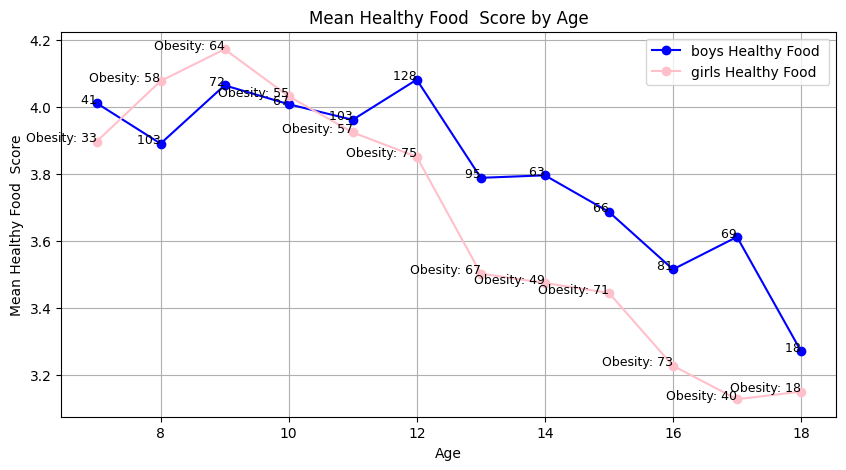

In [45]:
import matplotlib.pyplot as plt

# Assuming 'bmi_category' column is where obesity is marked
# Define obesity condition (assuming "Obesity" is the value for obesity category)
obesity_boy = df_boy[df_boy['BMIWHO4Halati2'] == 'Obesity']
obesity_girl = df_girl[df_girl['BMIWHO4Halati2'] == 'Obesity']

# Count the number of boys and girls with obesity in each age group
obesity_boy_count = obesity_boy.groupby('age').size()
obesity_girl_count = obesity_girl.groupby('age').size()

# Plot the results
a = 'Healthy Food '
plt.figure(figsize=(10, 5))

age_food_score_boy = df_boy.groupby('age')['food_score'].mean()
age_food_score_girl = df_girl.groupby('age')['food_score'].mean()

plt.plot(age_food_score_boy.index, age_food_score_boy.values, marker='o', linestyle='-', label=f'boys {a}', color='blue')
plt.plot(age_food_score_girl.index, age_food_score_girl.values, marker='o', linestyle='-', label=f'girls {a}', color='pink')

# Add the count of obesity on the plot
for age in obesity_boy_count.index:
    plt.text(age, age_food_score_boy.loc[age], f' {obesity_boy_count.get(age, 0)}', color='black', fontsize=9, ha='right')

for age in obesity_girl_count.index:
    plt.text(age, age_food_score_girl.loc[age], f'Obesity: {obesity_girl_count.get(age, 0)}', color='black', fontsize=9, ha='right')

plt.xlabel('Age')
plt.ylabel(f'Mean {a} Score')
plt.title(f'Mean {a} Score by Age')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_4['BMIWHO4Halati2'].value_counts().keys()

Index(['Normal', 'Underweight', 'Obesity', 'Overweight'], dtype='object', name='BMIWHO4Halati2')

In [ ]:
df_4['BMIWHO4Halati2'].value_counts()
category_mapping_11 = {'kheir':0, 'bali':1, 'bekhater nadarm':1, '0.0':0}
df_4['BMIWHO4Halati2'] = df_4['BMIWHO4Halati2'].map(category_mapping_11)

In [ ]:
age_somke_score = df_boy.groupby('age')['current_smoker_status'].sum()

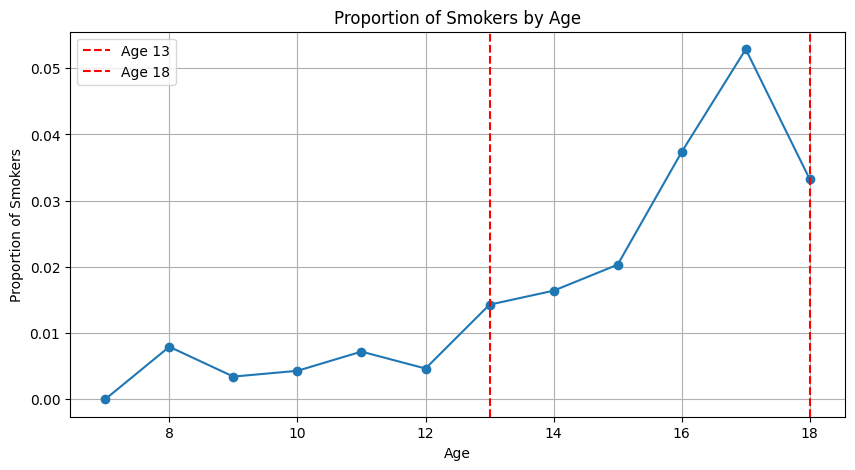

In [71]:
import matplotlib.pyplot as plt

# Count of smokers (0 means smoker, so we need to count 0s)
smoker_count = df_girl.groupby('age')['current_smoker_status'].apply(lambda x: (x == 1).sum())

# Total people in each age group
total_count = df_girl.groupby('age')['current_smoker_status'].count()

# Proportion of smokers
age_smoke_ratio = smoker_count / total_count

# Plot
plt.figure(figsize=(10, 5))
plt.plot(age_smoke_ratio.index, age_smoke_ratio.values, marker='o', linestyle='-')

# Add vertical lines at ages 13 and 18
plt.axvline(x=13, color='r', linestyle='--', label='Age 13')
plt.axvline(x=18, color='r', linestyle='--', label='Age 18')

plt.xlabel('Age')
plt.ylabel('Proportion of Smokers')
plt.title('Proportion of Smokers by Age')
plt.legend()  # Show legend for vertical lines
plt.grid(True)
plt.show()


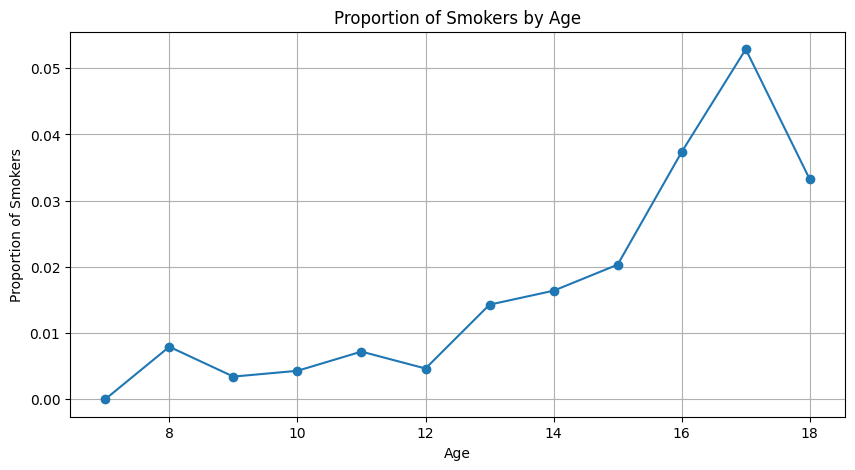

In [ ]:
import matplotlib.pyplot as plt

# Count of smokers (0 means smoker, so we need to count 0s)
smoker_count = df_girl.groupby('age')['current_smoker_status'].apply(lambda x: (x == 1).sum())

# Total people in each age group
total_count = df_girl.groupby('age')['current_smoker_status'].count()

# Proportion of smokers
age_smoke_ratio = smoker_count / total_count

# Plot
plt.figure(figsize=(10, 5))
plt.plot(age_smoke_ratio.index, age_smoke_ratio.values, marker='o', linestyle='-')

plt.xlabel('Age')
plt.ylabel('Proportion of Smokers')
plt.title('Proportion of Smokers by Age')
plt.grid(True)
plt.show()


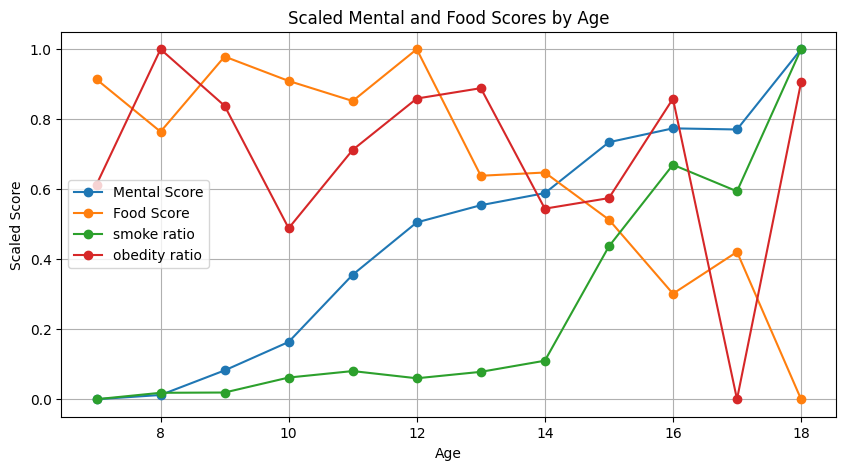

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Group by age and calculate the mean scores
age_men_score = df_boy.groupby('age')['mental_score'].mean()
age_food_score = df_boy.groupby('age')['food_score'].mean()
#Count of smokers (0 means smoker, so we need to count 0s)
smoker_count = df_boy.groupby('age')['current_smoker_status'].apply(lambda x: (x == 1).sum())

# Total people in each age group
total_count = df_boy.groupby('age')['current_smoker_status'].count()

# Proportion of smokers
age_smoke_ratio = smoker_count / total_count

#bmi 
bmi_count = df_boy.groupby('age')['BMIWHO4Halati2'].apply(lambda x: (x == 'Underweight').sum())

# Total people in each age group
total_count_bmi = df_boy.groupby('age')['BMIWHO4Halati2'].count()

# Proportion of smokers
ratio_bmi = bmi_count / total_count_bmi

# Convert to DataFrame for scaling
df_scaled = pd.DataFrame({'mental_score': age_men_score, 'food_score': age_food_score,'smoke':age_smoke_ratio, 'bmi':ratio_bmi})

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled[:] = scaler.fit_transform(df_scaled)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_scaled.index, df_scaled['mental_score'], marker='o', linestyle='-', label='Mental Score')
plt.plot(df_scaled.index, df_scaled['food_score'], marker='o', linestyle='-', label='Food Score')

plt.plot(df_scaled.index, df_scaled['smoke'], marker='o', linestyle='-', label='smoke ratio')
plt.plot(df_scaled.index, df_scaled['bmi'], marker='o', linestyle='-', label='obedity ratio')
plt.xlabel('Age')
plt.ylabel('Scaled Score')
plt.title('Scaled Mental and Food Scores by Age')
plt.legend()
plt.grid(True)
plt.show()


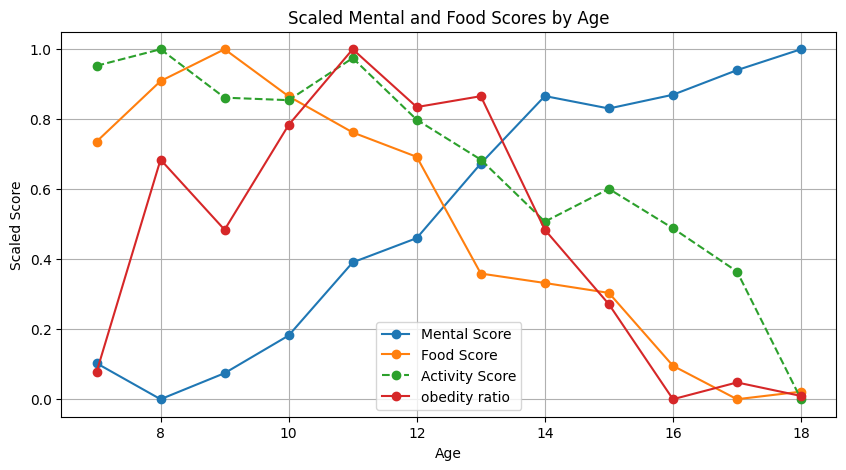

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Group by age and calculate the mean scores
age_men_score = df_girl.groupby('age')['mental_score'].mean()
age_food_score = df_girl.groupby('age')['food_score'].mean()
age_activity_score = df_girl.groupby('age')['activity_score'].mean()
#bmi 
bmi_count = df_girl.groupby('age')['BMIWHO4Halati2'].apply(lambda x: (x == 'Underweight').sum())

# Total people in each age group
total_count_bmi = df_girl.groupby('age')['BMIWHO4Halati2'].count()

# Proportion of smokers
ratio_bmi = bmi_count / total_count_bmi
# Convert to DataFrame for scaling
df_scaled = pd.DataFrame({'mental_score': age_men_score, 'food_score': age_food_score,'activity':age_activity_score,'bmi':ratio_bmi})

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled[:] = scaler.fit_transform(df_scaled)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_scaled.index, df_scaled['mental_score'], marker='o', linestyle='-', label='Mental Score')
plt.plot(df_scaled.index, df_scaled['food_score'], marker='o', linestyle='-', label='Food Score')
plt.plot(df_scaled.index, df_scaled['activity'], marker='o', linestyle='--', label='Activity Score')
plt.plot(df_scaled.index, df_scaled['bmi'], marker='o', linestyle='-', label='obedity ratio')
plt.xlabel('Age')
plt.ylabel('Scaled Score')
plt.title('Scaled Mental and Food Scores by Age')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
df_4['stomach_ache_number'].value_counts().keys()

Index([0, 3, 1, 2, 4], dtype='int64', name='stomach_ache_number')

In [64]:
encoder = LabelEncoder()

# Apply label encoding to multiple columns
columns_to_encode = [
'stomach_ache_number']  # Replace with your actual column names

for column in columns_to_encode:
    df_4[column ] = encoder.fit_transform(df_4[column])


In [56]:
import matplotlib.pyplot as plt

# Calculate the mean violence score for each BMI category
mean_violence = df_4.groupby('city')['ses'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
mean_violence.sort_values().plot(kind='bar', color='red', alpha=0.7)

plt.xlabel('BMI Category')
plt.ylabel('Mean Violence Score')
plt.title('Mean Violence Score in Each BMI Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show mean values on bars
for index, value in enumerate(mean_violence.sort_values()):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

plt.show()

KeyError: 'city'

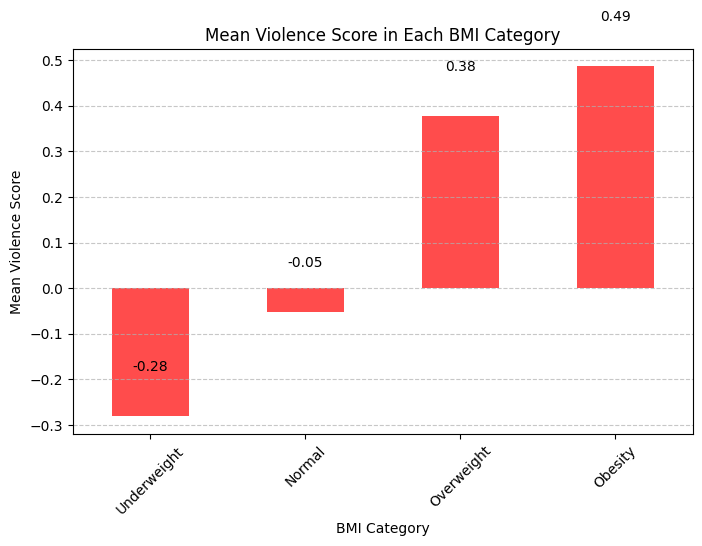

In [79]:
import matplotlib.pyplot as plt

# Calculate the mean violence score for each BMI category
mean_violence = df_4.groupby('BMIWHO4Halati2')['ses'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
mean_violence.sort_values().plot(kind='bar', color='red', alpha=0.7)

plt.xlabel('BMI Category')
plt.ylabel('Mean Violence Score')
plt.title('Mean Violence Score in Each BMI Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show mean values on bars
for index, value in enumerate(mean_violence.sort_values()):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

plt.show()


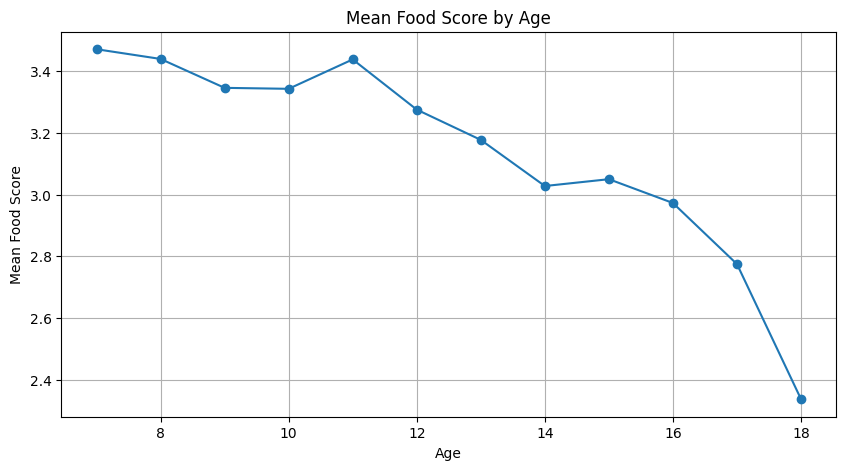

In [143]:
age_food_score = df_4.groupby('age')['activity_score'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(age_food_score.index, age_food_score.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Mean Food Score')
plt.title('Mean Food Score by Age')
plt.grid(True)
plt.show()

## ACtivity Score

In [136]:
df_4['Sportclasshours'].value_counts().keys()

Index(['2 saat', '1 saat', '0 saat', '3 saat ya bishtar'], dtype='object', name='Sportclasshours')

## hygiene

In [164]:
encoder = LabelEncoder()

# Apply label encoding to multiple columns
columns_to_encode = [

'iranregion','activeeversmoker','passivesmoker']  # Replace with your actual column names

for column in columns_to_encode:
    df_4[column ] = encoder.fit_transform(df_4[column])

In [172]:
df_4['ses'].value_counts()

ses
 1.548818    641
-1.778453    604
 1.306586    375
-1.415105    202
 1.646228    198
            ... 
-1.993979      1
 0.296189      1
-2.132271      1
-0.051491      1
 0.285147      1
Name: count, Length: 1435, dtype: int64

In [50]:
a=['age','iranregion','activeeversmoker','passivesmoker','gender','height','weight','food_score','violence_score','mental_score','hygiene_score','activity_score','ses']

In [ ]:
df.to_csv("")

,age,iranregion,activeeversmoker,passivesmoker,gender,height,weight,food_score,violence_score,mental_score,hygiene_score,activity_score,ses
0,12.0,West,no,no,boy,112.5,38.0,2,3.0,6.0,8,1.0,1.906827
1,17.0,West,no,no,boy,140.0,44.0,1,3.0,7.0,5,2.5,-1.987450
2,11.0,West,no,yes,girl,110.0,42.0,1,4.0,17.0,9,2.0,-0.738821
3,13.0,West,no,yes,girl,121.0,40.0,5,3.0,15.0,5,6.0,3.053004
4,10.0,West,no,yes,girl,107.0,33.0,3,3.0,5.0,9,1.0,1.548818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13535,11.0,West,no,yes,girl,142.0,29.0,1,7.0,13.0,7,3.0,-2.233210
13536,7.0,West,no,yes,girl,89.0,20.0,-2,3.0,9.0,9,5.5,1.882230
13539,11.0,West,no,no,boy,142.0,44.0,7,3.0,10.0,9,4.0,0.526363
13540,11.0,West,no,yes,girl,142.0,29.0,1,7.0,21.0,3,1.0,-0.722362


In [51]:
df=df_4[a]

In [178]:
df_girls=df[df['gender']=='girl']
df_boys=df[df['gender']=='boy']

In [179]:
gen_features=[
    

'gender','height','weight','food_score'
]

In [198]:
df.shape

(13199, 12)

In [197]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Drop general features from dataset
features_for_clustering = df_boys.drop(gen_features, axis=1)

# Step 2: Apply t-SNE for dimensionality reduction (to 2 or 3 dimensions)
# tsne = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
# features_reduced = tsne.fit_transform(features_for_clustering)
features_reduced=features_for_clustering
# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(features_reduced)



# Step 5: Evaluate clustering
inertia = kmeans.inertia_
silhouette = silhouette_score(features_reduced, clusters)
calinski_harabasz = calinski_harabasz_score(features_reduced, clusters)
davies_bouldin = davies_bouldin_score(features_reduced, clusters)

# Print evaluation results
print(f"Inertia (Within-cluster SSE): {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Inertia (Within-cluster SSE): 135075.26
Silhouette Score: 0.42
Calinski-Harabasz Index: 5595.86
Davies-Bouldin Index: 0.95


In [194]:
import plotly.express as px
import numpy as np
from sklearn.cluster import DBSCAN

scaled_features=features_for_clustering
eps_values = np.arange(0.5, 5, 0.5)  # Test values from 5 to 30 with step 5

min_samples_values = [5, 3, 15,35]  # Different min_samples

best_score = -1
best_params = {}

# Step 3: Iterate over all combinations of parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, )
        labels = dbscan.fit_predict(scaled_features)

        # Filter out noise points (-1) before evaluating
        mask = labels != -1
        filtered_features = scaled_features[mask]
        filtered_labels = labels[mask]

        if len(set(filtered_labels)) > 1:  # At least 2 clusters needed for evaluation

            silhouette = silhouette_score(filtered_features, filtered_labels)
            calinski_harabasz = calinski_harabasz_score(filtered_features, filtered_labels)
            davies_bouldin = davies_bouldin_score(filtered_features, filtered_labels)

            # Combine metrics to find best params (maximize silhouette, minimize Davies-Bouldin)
            score = silhouette - davies_bouldin  # A simple way to compare results

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples, 
                               'silhouette': silhouette, 
                               'calinski_harabasz': calinski_harabasz, 
                               'davies_bouldin': davies_bouldin}

# Step 4: Print best parameters
print("\nBest Parameters for DBSCAN:")
print(f"eps: {best_params['eps']}, min_samples: {best_params['min_samples']}")
print(f"Silhouette Score: {best_params['silhouette']:.2f}")
print(f"Calinski-Harabasz Index: {best_params['calinski_harabasz']:.2f}")
print(f"Davies-Bouldin Index: {best_params['davies_bouldin']:.2f}")



Best Parameters for DBSCAN:
eps: 3.0, min_samples: 5
Silhouette Score: 0.63
Calinski-Harabasz Index: 56.17
Davies-Bouldin Index: 0.32


In [196]:

# Apply DBSCAN using the best parameters
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = best_dbscan.fit_predict(scaled_features)
tsne = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
scaled_features= tsne.fit_transform(scaled_features)
# Convert to DataFrame for easier plotting
data = {
    "TSNE Component 1": scaled_features[:, 0],
    "TSNE Component 2": scaled_features[:, 1],
    "TSNE Component 3": scaled_features[:, 2],
    "Cluster": labels
}

import pandas as pd
df_plot = pd.DataFrame(data)
df_plot=df_plot[df_plot["Cluster"] == 1 ]
# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_plot, x='TSNE Component 1', y='TSNE Component 2', z='TSNE Component 3',
                     color=df_plot['Cluster'].astype(str), 
                     title="DBSCAN Clustering Result",
                     labels={'Cluster': 'Cluster Label'})

fig.show()


Best Bandwidth (Silhouette Score): 2.900000000000001 with Silhouette Score = 0.2898725205230143
Best Bandwidth (Davies-Bouldin Index): 0.1 with Davies-Bouldin Index = 0.03298591173875683


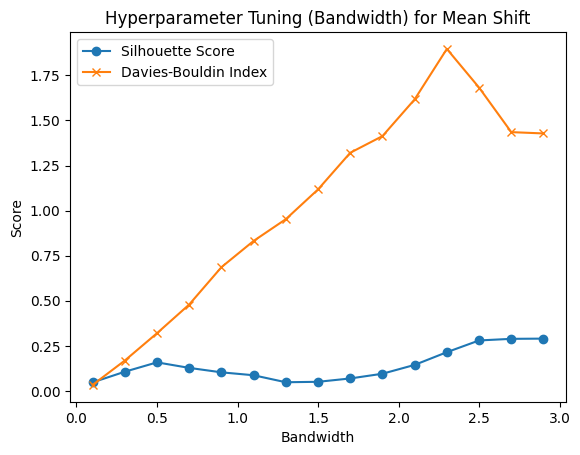

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Generate sample data
features_for_clustering = df_boys.drop(gen_features, axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(features_for_clustering)

# Define a range of bandwidth values to search over
bandwidth_range = np.arange(0.1, 3.0, 0.2)

# Initialize a list to store evaluation results
sil_scores = []
db_scores = []

# Grid search over different bandwidth values
for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    labels = ms.labels_

    # Evaluate using Silhouette Score
    sil_score = silhouette_score(X, labels)
    sil_scores.append(sil_score)

    # Evaluate using Davies-Bouldin Index
    db_index = davies_bouldin_score(X, labels)
    db_scores.append(db_index)

# Find the best bandwidth based on Silhouette Score
best_silhouette_index = np.argmax(sil_scores)
best_bandwidth_sil = bandwidth_range[best_silhouette_index]
best_silhouette = sil_scores[best_silhouette_index]

# Find the best bandwidth based on Davies-Bouldin Index (lowest is best)
best_db_index = np.argmin(db_scores)
best_bandwidth_db = bandwidth_range[best_db_index]
best_db_index_value = db_scores[best_db_index]

# Print results
print(f"Best Bandwidth (Silhouette Score): {best_bandwidth_sil} with Silhouette Score = {best_silhouette}")
print(f"Best Bandwidth (Davies-Bouldin Index): {best_bandwidth_db} with Davies-Bouldin Index = {best_db_index_value}")

# Plot results
plt.plot(bandwidth_range, sil_scores, label="Silhouette Score", marker='o')
plt.plot(bandwidth_range, db_scores, label="Davies-Bouldin Index", marker='x')
plt.xlabel('Bandwidth')
plt.ylabel('Score')
plt.legend()
plt.title('Hyperparameter Tuning (Bandwidth) for Mean Shift')
plt.show()


In [176]:
df.to_csv("feature_en.csv")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df, exclude_columns):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Identify columns to normalize
    columns_to_normalize = [col for col in df.columns if col not in exclude_columns]

    # Normalize only the selected columns
    df_to_normalize = df[columns_to_normalize]
    normalized_data = scaler.fit_transform(df_to_normalize)

    # Create DataFrame for normalized data
    normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize, index=df.index)

    # Add the excluded columns back
    result_df = pd.concat([df[exclude_columns], normalized_df], axis=1)

    # Ensure the column order remains the same as the original DataFrame
    result_df = result_df[df.columns]
    
    return result_df

# Example usage:
# Exclude 'column1' and 'column2' from normalization
exclude_columns = ['age']
df_cleaned = normalize_data(df_cleaned, exclude_columns)



In [ ]:
for col in df_cleaned.columns:
    print(f"Column: {col}, Type: {df_cleaned[col].dtype}")

Column: age, Type: float64
Column: close_friend_count, Type: float64
Column: spent_time_friend1, Type: float64
Column: spent_time_friend2, Type: float64
Column: frinedtime, Type: float64
Column: chatting_online, Type: float64
Column: diet_plan, Type: float64
Column: c_7, Type: float64
Column: c_8, Type: float64
Column: c_9, Type: float64
Column: c_10, Type: float64
Column: c_11, Type: float64
Column: breakfast_routindays, Type: float64
Column: fresh_juice, Type: float64
Column: e_26, Type: float64
Column: e_28, Type: float64
Column: e_30, Type: float64
Column: e_31, Type: float64
Column: physical_activiety, Type: float64
Column: physicalactivityscore, Type: float64
Column: TV_watching_routinday, Type: float64
Column: TVwatchingFriday, Type: float64
Column: TVwatchinghours, Type: float64
Column: computer_work_routinday, Type: float64
Column: computer_work_friday, Type: float64
Column: screentimehours, Type: float64
Column: sleep_hours_routinday, Type: float64
Column: sleep_hours_friday,

In [ ]:

# from sklearn.decomposition import TruncatedSVD



# def svd(X_train,X_test):
# # Apply SVD
#     svd = TruncatedSVD(n_components=20)  # choose the number of components
#     X_train_svd = svd.fit_transform(X_train)
#     X_test_svd = svd.transform(X_test)

#     return X_train_svd,X_test_svd



In [ ]:
df_cleaned.groupby('age')['current_smoker_status'].sum()


age
7.0      1.0
8.0      4.0
9.0      3.0
10.0     5.0
11.0     8.0
12.0     7.0
13.0     8.0
14.0     8.0
15.0    34.0
16.0    63.0
17.0    42.0
18.0    39.0
Name: current_smoker_status, dtype: float64

In [ ]:
df_cleaned=df_cleaned[df_cleaned['age']>= 15]

In [ ]:
df_cleaned['current_smoker_status'].value_counts()

current_smoker_status
0.0    1869
1.0     178
Name: count, dtype: int64

In [ ]:
df_cleaned

,age,close_friend_count,spent_time_friend1,spent_time_friend2,frinedtime,chatting_online,diet_plan,c_7,c_8,c_9,...,oil_type_pie_va_donbe,oil_type_roqan_heyvanu,oil_type_roqan_jamed,oil_type_roqan_maye,oil_type_sorkhkardani,dairy_type_p_kamcharb,dairy_type_p_porcharb,dairy_type_pastoriz_mauli,dairy_type_qeyre_pasto_mamuli,dairy_type_qeyre_pasto_porcharb
1,17.0,1.000000,0.333333,0.333333,0.333333,0.333333,0.0,0.5,0.5,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,16.0,1.000000,0.333333,0.333333,0.333333,0.333333,0.0,0.5,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,17.0,1.000000,1.000000,0.833333,0.833333,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28,16.0,0.666667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.5,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45,15.0,1.000000,0.833333,0.833333,0.833333,0.000000,0.0,0.5,0.5,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,16.0,1.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.5,0.5,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13440,16.0,0.333333,0.833333,0.166667,0.500000,0.666667,0.0,0.5,0.5,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13457,15.0,1.000000,0.000000,0.333333,0.166667,0.333333,0.0,0.5,0.5,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13458,15.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.5,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


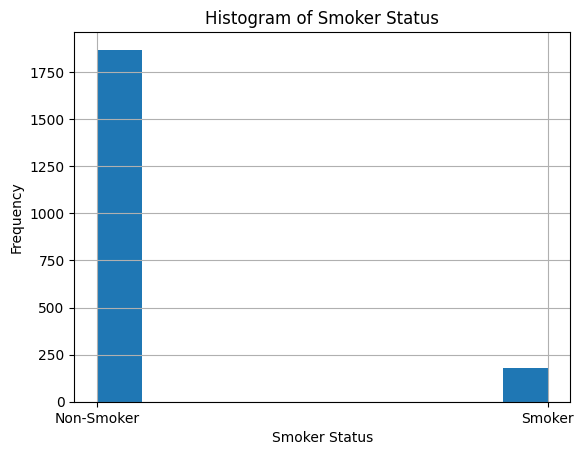

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram
df_cleaned['current_smoker_status'].hist()

# Set labels and title
plt.xlabel('Smoker Status')
plt.ylabel('Frequency')
plt.title('Histogram of Smoker Status')

# Set x-ticks for 0 (non-smoker) and 1 (smoker)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])

# Show the plot
plt.show()
